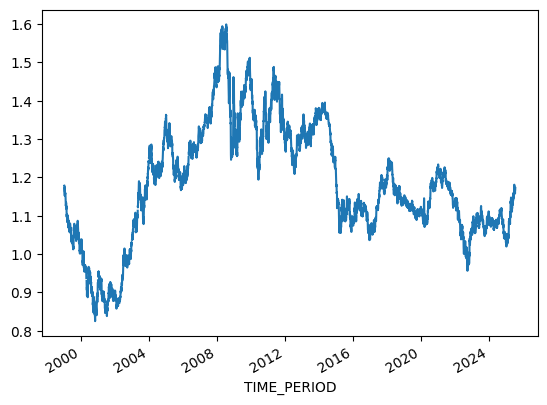

In [ ]:
from ecbdata import ecbdata
import pandas as pd
import matplotlib.pyplot as plt

# https://data.ecb.europa.eu/data/datasets/EXR/EXR.M.USD.EUR.SP00.A
df = ecbdata.get_series('EXR.D.USD.EUR.SP00.A') #start='2020-01'

df.TIME_PERIOD = pd.to_datetime(df.TIME_PERIOD) # 99Q1=100
df = df.set_index('TIME_PERIOD')
df.OBS_VALUE.plot()
plt.show()

## US dollar/Euro, Monthly

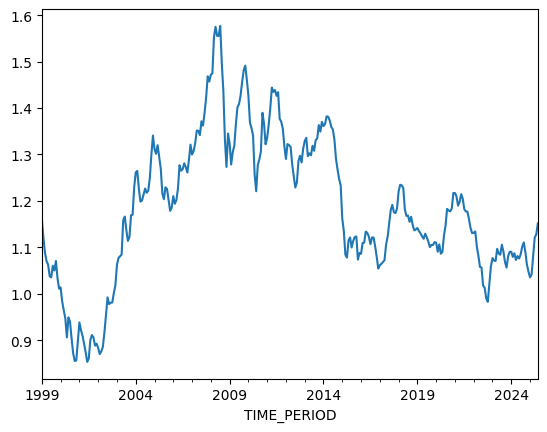

In [9]:
from ecbdata import ecbdata
import pandas as pd
import matplotlib.pyplot as plt

# https://data.ecb.europa.eu/data/datasets/EXR/EXR.M.USD.EUR.SP00.A
df = ecbdata.get_series('EXR.M.USD.EUR.SP00.A') #start='2020-01'

df.TIME_PERIOD = pd.to_datetime(df.TIME_PERIOD)
df = df.set_index('TIME_PERIOD')
df.OBS_VALUE.plot()
plt.show()


C:\Users\paolo\AppData\Local\Temp\ipykernel_25808\2406595143.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.TIME_PERIOD = pd.to_datetime(df.TIME_PERIOD)


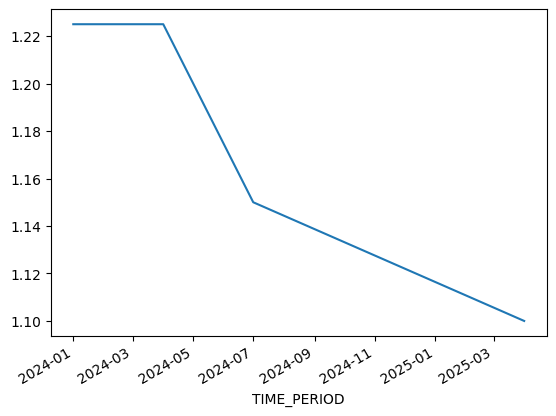

In [ ]:
# Forecaster 24 - Assumptions for US dollar exchange rate in Euro - 2026, Euro area (changing composition), Quarterly
# https://data.ecb.europa.eu/data/datasets/SPF/SPF.Q.U2.ASSU.USD.2026.Q.024
key = 'SPF.Q.U2.ASSU.USD.2026.Q.024'
df = ecbdata.get_series(key) #start='2020-01'

df.TIME_PERIOD = pd.to_datetime(df.TIME_PERIOD)
df = df.set_index('TIME_PERIOD')
df.OBS_VALUE.plot()
plt.show()

# FORECASTER

Survey of Professional Forecasters (SPF) (500098)

## HICP - inflazione

                                               TITLE  UNIT FREQ FCT_TOPIC  \
0  Euro area - HICP Inflation - Average of Point ...  PCPA    M      HICP   
1  Euro area - HICP Inflation - Average of Point ...  PCPA    M      HICP   
2  Euro area - HICP Inflation - Average of Point ...  PCPA    M      HICP   
3  Euro area - HICP Inflation - Average of Point ...  PCPA    M      HICP   

  FCT_HORIZON  OBS_VALUE  
0        P12M   2.069943  
1        P12M   1.954658  
2        P12M   1.983023  
3        P12M   1.981768  


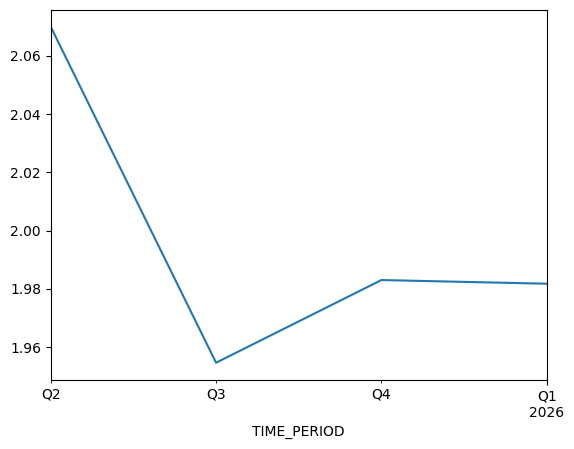

In [50]:
# Euro area - HICP Inflation - Average of Point forecasts - Target period ends 12 months after survey cycle begins, Euro area (changing composition), Monthly
key = 'SPF.M.U2.HICP.POINT.P12M.Q.AVG'
dal = '2025-06'
df = ecbdata.get_series(key, start=dal) #
print(df[['TITLE','UNIT', 'FREQ', 'FCT_TOPIC', 'FCT_HORIZON', 'OBS_VALUE']].tail())
df.TIME_PERIOD = pd.to_datetime(df.TIME_PERIOD)
df = df.set_index('TIME_PERIOD')
df.OBS_VALUE.plot()
plt.show()

   TIME_PERIOD                                              TITLE  UNIT FREQ  \
95     2024-Q2  Euro area - Real GDP growth - Average of Point...  PCPA    Q   
96     2024-Q3  Euro area - Real GDP growth - Average of Point...  PCPA    Q   
97     2024-Q4  Euro area - Real GDP growth - Average of Point...  PCPA    Q   
98     2025-Q1  Euro area - Real GDP growth - Average of Point...  PCPA    Q   
99     2025-Q2  Euro area - Real GDP growth - Average of Point...  PCPA    Q   

   FCT_TOPIC FCT_HORIZON  OBS_VALUE  
95      RGDP          LT   1.318856  
96      RGDP          LT   1.304278  
97      RGDP          LT   1.274264  
98      RGDP          LT   1.255968  
99      RGDP          LT   1.333140  


C:\Users\paolo\AppData\Local\Temp\ipykernel_25808\639613671.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.TIME_PERIOD = pd.to_datetime(df.TIME_PERIOD)


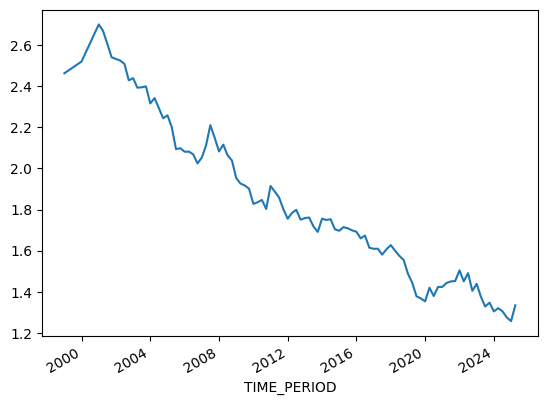

In [49]:
# Euro area - HICP Inflation - Average of Point forecasts - Target period ends 12 months after survey cycle begins, Euro area (changing composition), Monthly
key = 'SPF.Q.U2.RGDP.POINT.LT.Q.AVG'
dal = '2025-Q2'
from ecbdata import ecbdata
df = ecbdata.get_series(key)
print(df[['TIME_PERIOD', 'TITLE','UNIT', 'FREQ', 'FCT_TOPIC', 'FCT_HORIZON', 'OBS_VALUE']].tail())
df.TIME_PERIOD = pd.to_datetime(df.TIME_PERIOD)
df = df.set_index('TIME_PERIOD')
df.OBS_VALUE.plot()
plt.show()

   TIME_PERIOD  OBS_VALUE       DATE
95     2024-Q2   1.318856 2024-03-31
96     2024-Q3   1.304278 2024-03-31
97     2024-Q4   1.274264 2024-06-30
98     2025-Q1   1.255968 2025-03-31
99     2025-Q2   1.333140 2025-03-31


C:\Users\paolo\AppData\Local\Temp\ipykernel_25808\3004058181.py:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE'] = pd.to_datetime(


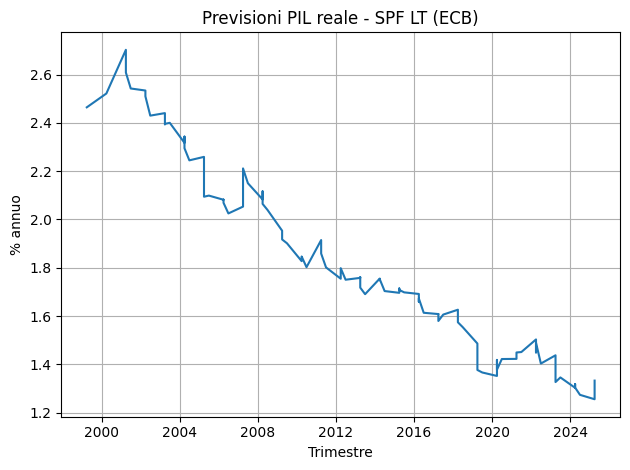

In [48]:
import pandas as pd
import requests
import xml.etree.ElementTree as ET

url = "https://sdw-wsrest.ecb.europa.eu/service/data/SPF/Q.U2.RGDP.POINT.LT.Q.AVG?detail=dataonly"

# Richiesta
resp = requests.get(url, headers={'Accept': 'application/vnd.sdmx.genericdata+xml;version=2.1'})
root = ET.fromstring(resp.content)

# Estrazione delle osservazioni
ns = {'ns': 'http://www.sdmx.org/resources/sdmxml/schemas/v2_1/data/generic'}
obs = root.findall('.//ns:Obs', ns)

data = []
for ob in obs:
    time = ob.find('.//ns:ObsDimension', ns).attrib['value']
    value = ob.find('.//ns:ObsValue', ns).attrib.get('value', None)
    if value:
        data.append({'TIME_PERIOD': time, 'OBS_VALUE': float(value)})

df = pd.DataFrame(data)
# df = df[df['TIME_PERIOD'] >= '2025-Q2'].copy()

# Parsing trimestre
df['DATE'] = pd.to_datetime(
    df['TIME_PERIOD'].str.replace(r'Q([1-4])', r'-\1', regex=True)
).dt.to_period('Q').dt.to_timestamp('Q')

print(df.tail())

# Grafico
import matplotlib.pyplot as plt

plt.plot(df['DATE'], df['OBS_VALUE'])
plt.title('Previsioni PIL reale - SPF LT (ECB)')
plt.ylabel('% annuo')
plt.xlabel('Trimestre')
plt.grid(True)
plt.tight_layout()
plt.show()




  TIME_PERIOD                                              TITLE  UNIT FREQ  \
0     2025-03  Euro area - Core inflation - Average of Point ...  PCPA    M   
1     2025-06  Euro area - Core inflation - Average of Point ...  PCPA    M   
2     2025-09  Euro area - Core inflation - Average of Point ...  PCPA    M   
3     2025-12  Euro area - Core inflation - Average of Point ...  PCPA    M   
4     2026-03  Euro area - Core inflation - Average of Point ...  PCPA    M   

  FCT_TOPIC FCT_HORIZON  OBS_VALUE  
0      CORE        P12M   2.185621  
1      CORE        P12M   2.209009  
2      CORE        P12M   2.076768  
3      CORE        P12M   2.067997  
4      CORE        P12M   2.185007  


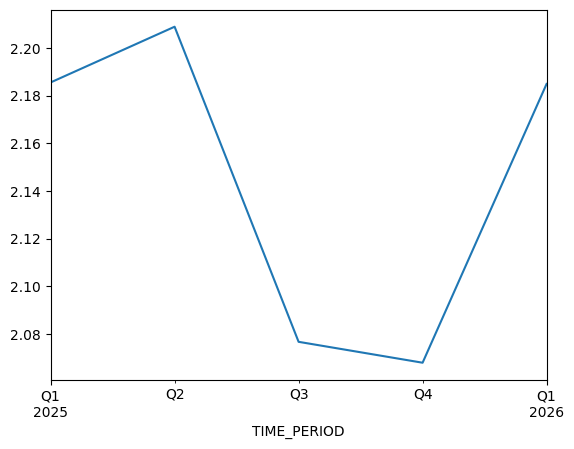

In [52]:
# Euro area - Core inflation - Average of Point forecasts - Target period ends 12 months after survey cycle begins, Euro area (changing composition), Monthly 
key = 'SPF.M.U2.CORE.POINT.P12M.Q.AVG'
dal = '2025-Q1'
from ecbdata import ecbdata
df = ecbdata.get_series(key, start = dal)
print(df[['TIME_PERIOD', 'TITLE','UNIT', 'FREQ', 'FCT_TOPIC', 'FCT_HORIZON', 'OBS_VALUE']].tail())
df.TIME_PERIOD = pd.to_datetime(df.TIME_PERIOD)
df = df.set_index('TIME_PERIOD')
df.OBS_VALUE.plot()
plt.show()

I numeri che vedi tipo FORECASTER=5, FORECASTER=33 nei dataset della BCE, ad esempio nello Survey of Professional Forecasters (SPF), rappresentano:

🔎 Identificatori anonimi dei previsori individuali
Ogni previsore (tipicamente una banca, istituto di ricerca, centro studi) che partecipa all’indagine SPF viene anonimizzato con un codice numerico.

Ad esempio:

FORECASTER=5 → potrebbe essere BNP Paribas

FORECASTER=33 → potrebbe essere Oxford Economics

⚠️ Ma non lo sapremo mai perché la BCE non pubblica l'identità dei singoli previsori.

In [79]:
# Euro area - Forecaster 14 - Core inflation Point forecasts - Target period ends 24 months after survey cycle begins, Euro area (changing composition), Monthly 
key = 'SPF.M.U2.CORE.POINT.P24M.Q.AVG+006+014+033+026+127+095+085+047+049+118+114+115'
dal = '2025-Q3'
from ecbdata import ecbdata
df = ecbdata.get_series(key, start = dal)
# Crea pivot: righe = tempo, colonne = previsori, valori = previsioni
pivot_df = df.pivot_table(index='TIME_PERIOD', columns='FCT_SOURCE', values='OBS_VALUE')

# Ordina per data
pivot_df = pivot_df.sort_index()

# Mostra
(pivot_df)


FCT_SOURCE,006,014,026,033,047,049,085,095,114,115,118,127,AVG
TIME_PERIOD,,,,,,,,,,,,,
2025-09,2.20,2.8,1.8,2.4,NaN,2.1,2.017840,2.257852,2.2,2.200000,1.815391,2.5,2.159471
2025-12,2.10,1.9,1.8,2.4,1.7,2.0,2.012328,1.826436,NaN,2.100000,1.840000,2.0,2.043842
2026-03,2.00,3.2,1.8,2.1,2.0,2.0,2.272459,2.280626,1.7,2.064315,1.930000,2.0,2.084673
2026-06,2.00,2.0,1.8,2.1,NaN,2.0,NaN,1.853134,NaN,1.700000,1.960000,2.0,1.993602
2026-09,1.90,1.8,1.6,2.0,NaN,2.0,2.016777,1.973641,1.5,1.900000,2.000000,2.0,1.933947
2026-12,1.95,NaN,2.0,2.1,1.8,2.0,1.884375,1.945242,1.5,1.921318,2.020000,2.0,1.947224
2027-03,2.00,2.7,1.9,2.0,NaN,2.0,2.000000,1.948924,NaN,1.978115,1.600000,2.0,2.119624


In [ ]:
from ecbdata import ecbdata
import pandas as pd
import matplotlib.pyplot as plt

# Lista dei codici forecaster da 001 a 200, formattati a 3 cifre
forecasters = [f"{i:03d}" for i in range(1, 201)]

# Aggiungi 'AVG' se vuoi includere anche la media
forecasters.insert(0, 'AVG')

# Parametri fissi
base_key = 'SPF.M.U2.CORE.POINT.P24M.Q'
dal = '2025-Q3'

# Batch da 20 per evitare superamento limite URL
batch_size = 20
all_dfs = []

for i in range(0, len(forecasters), batch_size):
    batch = forecasters[i:i+batch_size]
    key = f"{base_key}." + '+'.join(batch)
    try:
        df = ecbdata.get_series(key, start=dal)
        all_dfs.append(df)
    except Exception as e:
        print(f"Errore per batch {batch}: {e}")

# Unisci tutti i dati in un unico DataFrame
df_total = pd.concat(all_dfs, ignore_index=True)

# PIVOT finale
df_total['TIME_PERIOD'] = pd.to_datetime(df_total['TIME_PERIOD'])
pivot_df = df_total.pivot_table(index='TIME_PERIOD', columns='FCT_SOURCE', values='OBS_VALUE')
pivot_df = pivot_df.sort_index()

# Mostra anteprima


# Facoltativo: salva in CSV o plotta
# pivot_df.to_csv("spf_forecaster_core_p24m.csv")
# pivot_df.plot(legend=False, alpha=0.3); plt.show()


Errore per batch ['160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179']: REQUEST ERROR 404: No results found. There are no results matching the query.
Errore per batch ['180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199']: REQUEST ERROR 404: No results found. There are no results matching the query.
Errore per batch ['200']: REQUEST ERROR 404: No results found. There are no results matching the query.


FCT_SOURCE,23,24,26,29,33,37,39,45,47,49,...,001,002,004,005,006,008,010,014,016,AVG
TIME_PERIOD,,,,,,,,,,,,,,,,,,,,,
2025-09-01,3.1,2.116667,1.8,NaN,2.4,2.3,1.883008,1.892836,NaN,2.1,...,2.0,2.0,1.9,2.0,2.2,1.9,NaN,2.8,2.0,2.159471
2025-12-01,2.9,1.906586,1.8,2.1,2.4,2.3,1.902762,NaN,1.7,2.0,...,2.0,NaN,2.0,1.8,2.1,NaN,NaN,1.9,2.0,2.043842
2026-03-01,2.8,NaN,1.8,2.0,2.1,2.2,2.062733,1.960000,2.0,2.0,...,NaN,2.1,NaN,1.8,2.0,1.8,NaN,3.2,1.6,2.084673
2026-06-01,2.8,NaN,1.8,2.0,2.1,2.1,1.832514,2.031964,NaN,2.0,...,NaN,NaN,NaN,NaN,2.0,1.7,NaN,2.0,1.4,1.993602
2026-09-01,NaN,NaN,1.6,NaN,2.0,2.1,1.851962,NaN,NaN,2.0,...,NaN,NaN,2.0,1.8,1.9,1.7,NaN,1.8,1.6,1.933947


In [84]:
# Forza i codici forecaster come stringhe a 3 cifre (es. '006')
df_total['FCT_SOURCE'] = df_total['FCT_SOURCE'].astype(str).str.zfill(3)
df_total.loc[df_total['FCT_SOURCE'].str.upper() == 'AVG', 'FCT_SOURCE'] = 'AVG'

# Conversione e pivot
df_total['TIME_PERIOD'] = pd.to_datetime(df_total['TIME_PERIOD'])
pivot_df = df_total.pivot_table(index='TIME_PERIOD', columns='FCT_SOURCE', values='OBS_VALUE')
pivot_df = pivot_df.sort_index()
pivot_df.T

TIME_PERIOD,2025-09-01,2025-12-01,2026-03-01,2026-06-01,2026-09-01,2026-12-01,2027-03-01
FCT_SOURCE,,,,,,,
001,2.000000,2.000000,NaN,NaN,NaN,NaN,2.000000
002,2.000000,NaN,2.100000,NaN,NaN,NaN,NaN
004,1.900000,2.000000,NaN,NaN,2.000000,2.000000,NaN
005,2.000000,1.800000,1.800000,NaN,1.800000,1.800000,2.000000
006,2.200000,2.100000,2.000000,2.000000,1.900000,1.950000,2.000000
008,1.900000,NaN,1.800000,1.700000,1.700000,1.600000,NaN
010,NaN,NaN,NaN,NaN,NaN,1.700000,NaN
014,2.800000,1.900000,3.200000,2.000000,1.800000,NaN,2.700000
016,2.000000,2.000000,1.600000,1.400000,1.600000,1.600000,2.500000


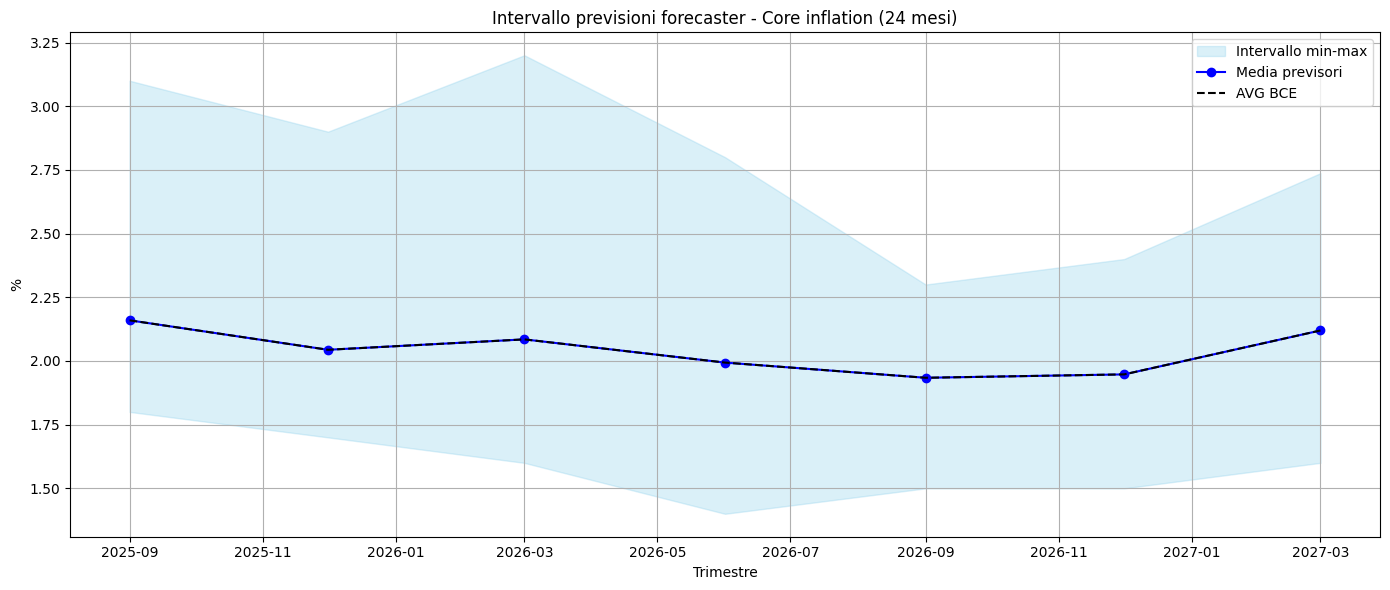

In [86]:
import matplotlib.pyplot as plt

# Escludi colonna AVG dal calcolo, se presente
forecast_cols = pivot_df.columns.difference(['AVG'])

# Calcola min, max, media per ogni trimestre
min_vals = pivot_df[forecast_cols].min(axis=1)
max_vals = pivot_df[forecast_cols].max(axis=1)
avg_vals = pivot_df[forecast_cols].mean(axis=1)  # oppure pivot_df['AVG']

plt.figure(figsize=(14, 6))
# Plot intervallo min-max come area
plt.fill_between(pivot_df.index, min_vals, max_vals, color='skyblue', alpha=0.3, label='Intervallo min-max')

# Linea della media
plt.plot(pivot_df.index, avg_vals, color='blue', marker='o', label='Media previsori')

# (Opzionale) linea AVG ufficiale, se presente
if 'AVG' in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df['AVG'], color='black', linestyle='--', label='AVG BCE')

# Stile
plt.title('Intervallo previsioni forecaster - Core inflation (24 mesi)')
plt.ylabel('%')
plt.xlabel('Trimestre')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [87]:
# Escludi AVG
forecast_cols = pivot_df.columns.difference(['AVG'])

# Calcola deviazione standard e range
agreement_df = pd.DataFrame({
    'std': pivot_df[forecast_cols].std(axis=1),
    'range': pivot_df[forecast_cols].max(axis=1) - pivot_df[forecast_cols].min(axis=1),
    'mean': pivot_df[forecast_cols].mean(axis=1)
})


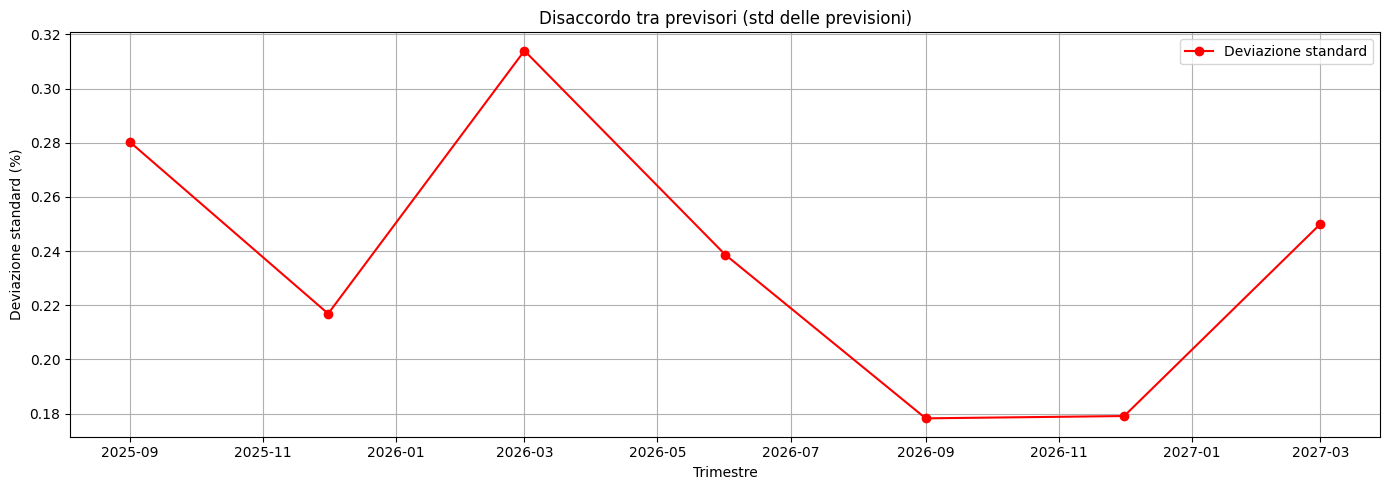

In [89]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

# Colore inverso: meno std → più accordo
plt.plot(agreement_df.index, agreement_df['std'], marker='o', color='red', label='Deviazione standard')
plt.title("Disaccordo tra previsori (std delle previsioni)")
plt.ylabel("Deviazione standard (%)")
plt.xlabel("Trimestre")
plt.grid(True)
plt.xticks()
plt.tight_layout()
plt.legend()
plt.show()


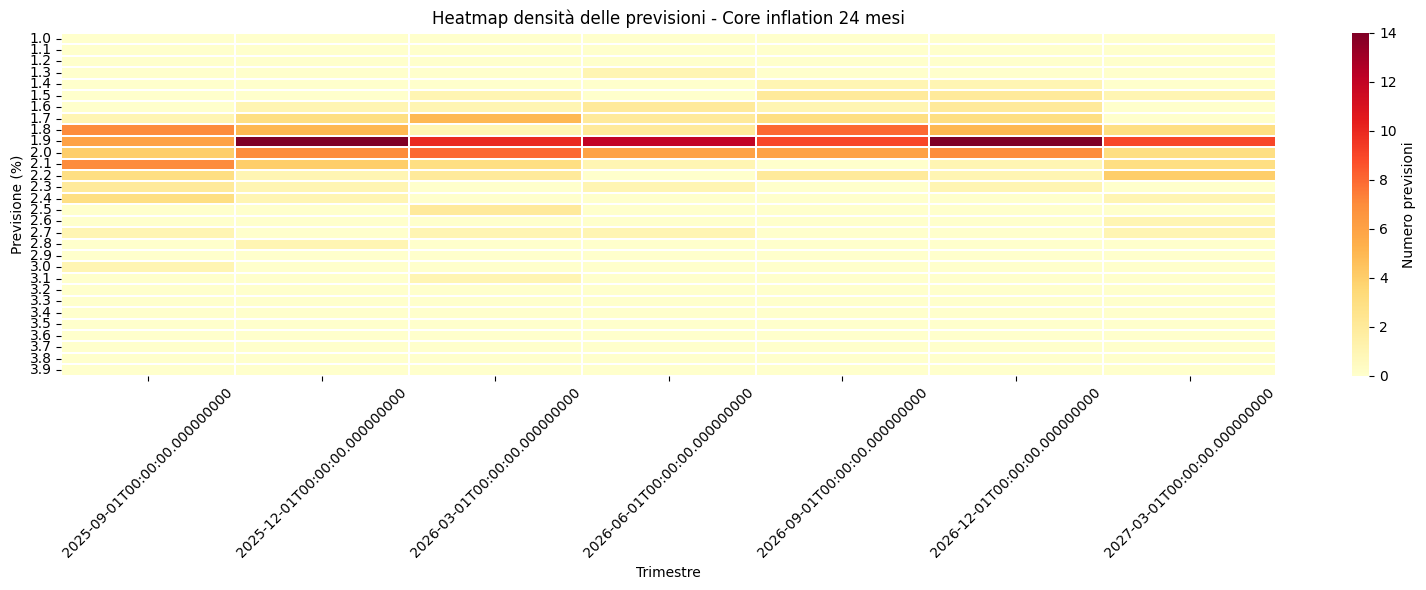

In [90]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Escludi AVG
forecast_cols = pivot_df.columns.difference(['AVG'])

# Intervallo dei valori (es. da 1.0 a 4.0 con passo 0.1)
bins = np.arange(1.0, 4.1, 0.1)
labels = [f"{b:.1f}" for b in bins[:-1]]

# Costruzione matrice: righe = trimestri, colonne = bin percentuali
heatmap_data = pd.DataFrame(0, index=pivot_df.index, columns=labels)

for date in pivot_df.index:
    forecasts = pivot_df.loc[date, forecast_cols].dropna()
    counts, _ = np.histogram(forecasts, bins=bins)
    heatmap_data.loc[date] = counts

# Plot
plt.figure(figsize=(16, 6))
sns.heatmap(
    heatmap_data.T, 
    cmap="YlOrRd", 
    cbar_kws={'label': 'Numero previsioni'}, 
    linewidths=0.1
)

plt.title("Heatmap densità delle previsioni - Core inflation 24 mesi")
plt.xlabel("Trimestre")
plt.ylabel("Previsione (%)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [91]:
heatmap_data

,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,...,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9
TIME_PERIOD,,,,,,,,,,,,,,,,,,,,,
2025-09-01,0,0,0,0,0,0,0,1,7,6,...,1,0,0,0,0,0,0,0,0,0
2025-12-01,0,0,0,0,0,0,1,3,5,14,...,0,0,0,0,0,0,0,0,0,0
2026-03-01,0,0,0,0,0,1,1,5,1,10,...,0,1,0,0,0,0,0,0,0,0
2026-06-01,0,0,0,1,0,0,2,2,2,12,...,0,0,0,0,0,0,0,0,0,0
2026-09-01,0,0,0,0,1,2,1,3,8,9,...,0,0,0,0,0,0,0,0,0,0
2026-12-01,0,0,0,0,1,2,2,3,5,14,...,0,0,0,0,0,0,0,0,0,0
2027-03-01,0,0,0,0,0,1,0,0,3,9,...,0,0,0,0,0,0,0,0,0,0
